In this blog post, I want to share something that I recently discovered while using Scipy’s optimizing library and its general optimizers. I’ll try to recreate a context in which the same problem occurs.

Let’s say we want to find the miminum of a function of two parameters.

Text(0, 0.5, 'y')

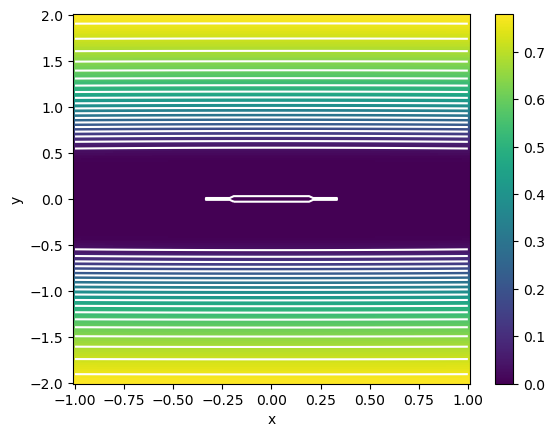

In [33]:
from turtle import color
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.exp(-1/(.01*x[0]**2 + x[1]**2))

X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-2, 2, 200))


plt.pcolormesh(X, Y, f([X, Y]), shading="auto")
plt.colorbar()
plt.contour(X, Y, f([X, Y]), 20, colors="w")
plt.xlabel("x")
plt.ylabel("y")


What makes this founction special? It is very insensitive to its first parameter, $x$, while being quite sensitive to its second parameter $y$.

Where does its minimum lie? At (0, 0). However, judging by its graph, it’s not so easy to be sure of it. Let’s plot the same thing in log scale to see if it’s easier to spot.


C:\Users\FL232714\AppData\Local\Temp\ipykernel_12820\3585886120.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(X, Y, np.log10(f([X, Y])), shading="auto")
C:\Users\FL232714\AppData\Local\Temp\ipykernel_12820\3585886120.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.contour(X, Y, np.log10(f([X, Y])), 3, colors="w")


Text(0, 0.5, 'y')

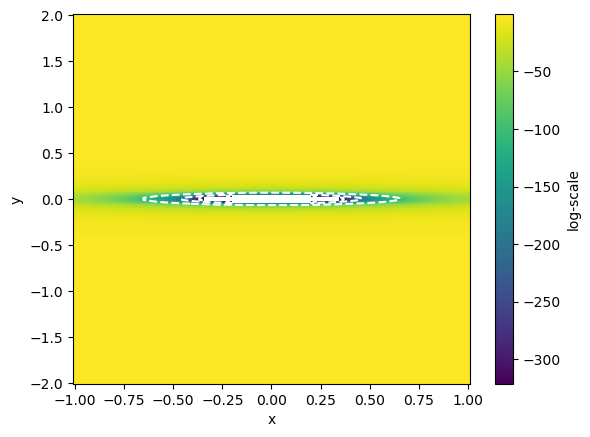

In [37]:
plt.pcolormesh(X, Y, np.log10(f([X, Y])), shading="auto")
plt.colorbar(label="log-scale")
plt.contour(X, Y, np.log10(f([X, Y])), 3, colors="w")
plt.xlabel("x")
plt.ylabel("y")


In the log-scale, it appears that the minimum is indeed quite flat along the x-direction.

Now imagine that we need to find the minimum of this function, using gradient information. How does the standard BFGS opitimizer do?

In [53]:
from scipy import optimize


result = optimize.minimize(f, [1, 1], method="BFGS", tol=1e-10, options={'eps': 1e-5})

result

      fun: 2.435735557933475e-13
 hess_inv: array([[   29232.03943579,   795452.12702773],
       [  795452.12702773, 21646309.1232013 ]])
      jac: array([4.06228669e-12, 6.46097188e-11])
  message: 'Optimization terminated successfully.'
     nfev: 78
      nit: 24
     njev: 26
   status: 0
  success: True
        x: array([0.98850958, 0.15703429])

Interestingly, the optimizer does not work as we would expect. The reason is clear: the gradient becomes very small and below the tolerance set by the options so the procedure stops.

However, we are still quite far from the true optimum, and more so in the first dimension. So in this case, we cannot find the true solution.

One way of getting out of this situation is to rescale the variables. Let’s define a second function with rescaled values.

In [68]:
def g(x):
    return f([100*x[0], 10*x[1]])

result = optimize.minimize(g, [.01, .1], method="BFGS", tol=1e-10, options={'eps': 1e-5})

result



      fun: 2.2402323795942752e-14
 hess_inv: array([[1.66295961e+01, 4.57339817e+03],
       [4.57339817e+03, 1.33744703e+06]])
      jac: array([8.79065825e-12, 7.97821424e-11])
  message: 'Optimization terminated successfully.'
     nfev: 66
      nit: 10
     njev: 22
   status: 0
  success: True
        x: array([0.00197755, 0.0177274 ])

What did just happen? The rescaled version of the same function leads to a much better solution! Is this surprising? Let’s see a plot of the function `g`.

Text(0, 0.5, 'y')

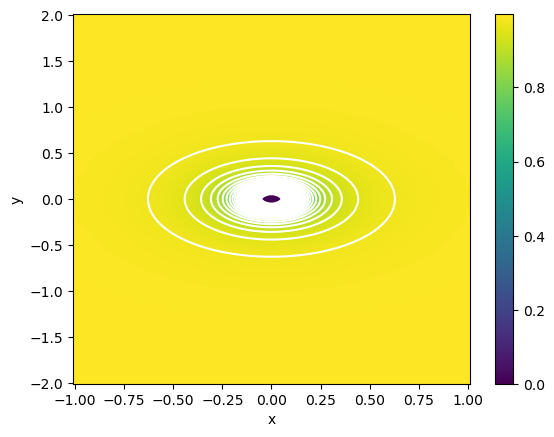

In [65]:
plt.pcolormesh(X, Y, g([X, Y]), shading="auto")
plt.colorbar()
plt.contour(X, Y, g([X, Y]), 40, colors="w")
plt.xlabel("x")
plt.ylabel("y")
